In [71]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import os
import gensim
from gensim.models import LsiModel
import numpy as np
from gensim import corpora
import pandas as pd
%matplotlib inline

In [72]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [73]:
data = pd.read_csv('General_Debates/un-general-debates.csv')

In [74]:
singleDoc = data["text"][0]

In [75]:
corpusFromDoc = singleDoc.split('\n')

In [76]:
len(corpusFromDoc)

31

In [77]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [78]:
cleanedDocs = [clean(doc) for doc in corpusFromDoc]

In [88]:
listOfTokens = [doc.split() for doc in cleanedDocs]
dictionary = corpora.Dictionary(listOfTokens) 

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in listOfTokens]

In [89]:
lsamodel = LsiModel(doc_term_matrix, id2word = dictionary)  # train model
print(lsamodel.print_topics(-1))

[(0, '0.262*"state" + 0.231*"security" + 0.212*"country" + 0.190*"development" + 0.185*"situation" + 0.178*"environment" + 0.173*"international" + 0.158*"global" + 0.156*"economic" + 0.146*"small"'), (1, '0.280*"country" + -0.280*"security" + -0.273*"state" + 0.191*"trade" + 0.189*"situation" + -0.171*"small" + 0.156*"development" + 0.137*"developed" + 0.114*"economic" + 0.112*"growth"'), (2, '0.344*"environment" + 0.220*"global" + 0.214*"sea" + 0.183*"level" + -0.159*"security" + 0.156*"rise" + 0.151*"maldives" + 0.142*"degradation" + 0.142*"tidal" + 0.140*"upon"'), (3, '-0.213*"conflict" + -0.211*"people" + -0.197*"support" + -0.193*"peace" + -0.153*"welcome" + 0.146*"state" + -0.145*"palestine" + -0.131*"international" + 0.131*"country" + 0.124*"small"'), (4, '-0.315*"peace" + -0.293*"zone" + -0.220*"reduction" + 0.187*"people" + -0.159*"arm" + -0.147*"nuclearweaponfree" + 0.144*"international" + -0.126*"weapon" + -0.118*"security" + -0.109*"good"'), (5, '0.203*"weaker" + -0.187*"ec

In [90]:
conceptMap = dict()
conceptMapWeights = dict()
for tup in lsamodel.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMap[tup[0]] = l1
    conceptMapWeights[tup[0]] = l2

In [91]:
print(conceptMap)

{0: ['state', 'security', 'country', 'development', 'situation', 'environment', 'international', 'global', 'economic', 'small'], 1: ['country', 'security', 'state', 'trade', 'situation', 'small', 'development', 'developed', 'economic', 'growth'], 2: ['environment', 'global', 'sea', 'level', 'security', 'rise', 'maldives', 'degradation', 'tidal', 'upon'], 3: ['conflict', 'people', 'support', 'peace', 'welcome', 'state', 'palestine', 'international', 'country', 'small'], 4: ['peace', 'zone', 'reduction', 'people', 'arm', 'nuclearweaponfree', 'international', 'weapon', 'security', 'good'], 5: ['weaker', 'economic', 'level', 'greater', 'sovereignty', 'assistance', 'friend', 'misconception', 'bilateral', 'value'], 6: ['conflict', 'maldives', 'continues', 'support', 'situation', 'year', 'zone', 'struggle', 'sovereignty', 'people'], 7: ['conflict', 'development', 'economic', 'continues', 'south', 'present', 'sovereignty', 'apartheid', 'long', 'situation'], 8: ['apartheid', 'namibia', 'africa'

In [92]:
trainingClustering = conceptMapWeights.values()
trainingClustering = list(trainingClustering)


In [93]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

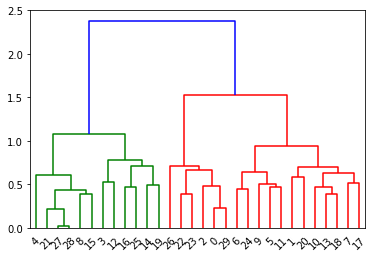

In [94]:
dendrogram = sch.dendrogram(sch.linkage(trainingClustering,method='ward'))

In [95]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [96]:
clusters = hc.fit_predict(trainingClustering)

In [97]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
for i in range(len(trainingClustering)):
    if clusters[i] == 0:
        cluster1.append(trainingClustering[i])
    elif clusters[i] == 1:
        cluster2.append(trainingClustering[i])
    elif clusters[i] == 2:
        cluster3.append(trainingClustering[i])
    elif clusters[i] == 3:
        cluster4.append(trainingClustering[i])

In [98]:
print("Length of Cluster 1:",len(cluster1))
print("Length of Cluster 2:",len(cluster2))
print("Length of Cluster 3:",len(cluster3))
print("Length of Cluster 4:",len(cluster4))

Length of Cluster 1: 12
Length of Cluster 2: 6
Length of Cluster 3: 6
Length of Cluster 4: 6


In [99]:
conceptWeightList = list(conceptMapWeights.values())
conceptWordsList = list(conceptMap.values())

In [100]:
cluster1Words = []
cluster2Words = []
cluster3Words = []
cluster4Words = []
for vec in cluster1:
    ind = conceptWeightList.index(vec)
    cluster1Words.append(conceptWordsList[ind])
for vec in cluster2:
    ind = conceptWeightList.index(vec)
    cluster2Words.append(conceptWordsList[ind])
for vec in cluster3:
    ind = conceptWeightList.index(vec)
    cluster3Words.append(conceptWordsList[ind])
for vec in cluster4:
    ind = conceptWeightList.index(vec)
    cluster4Words.append(conceptWordsList[ind])

In [101]:
# Only for WordCloud. Total Show-off!
cluster1Sents = [' '.join(ele) for ele in cluster1Words]
cluster2Sents = [' '.join(ele) for ele in cluster2Words]
cluster3Sents = [' '.join(ele) for ele in cluster3Words]
cluster4Sents = [' '.join(ele) for ele in cluster4Words]

In [102]:
cluster1Sents = ' '.join(cluster1Sents)
cluster2Sents = ' '.join(cluster2Sents)
cluster3Sents = ' '.join(cluster3Sents)
cluster4Sents = ' '.join(cluster4Sents)

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

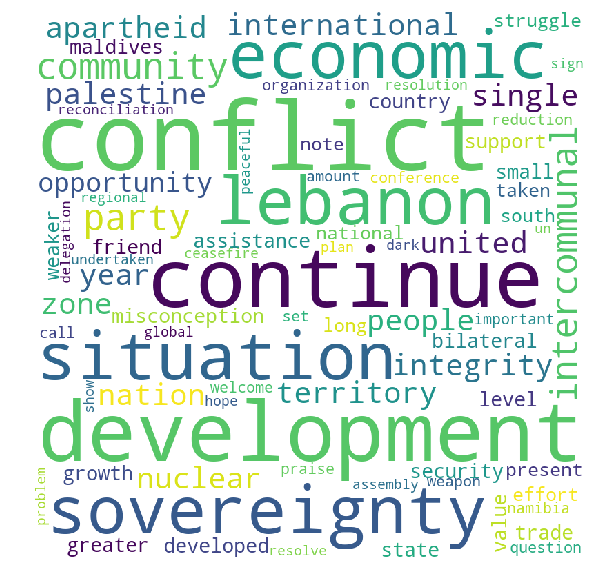

In [104]:
# WordCloud for Cluster 1
wordcloud1 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

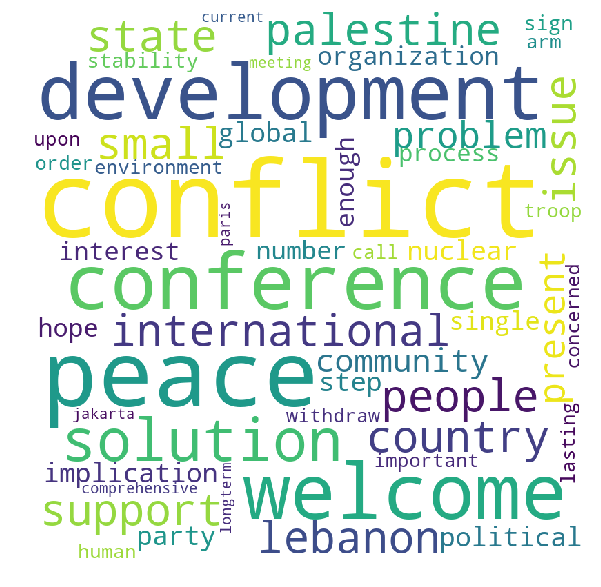

In [105]:
wordcloud2 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

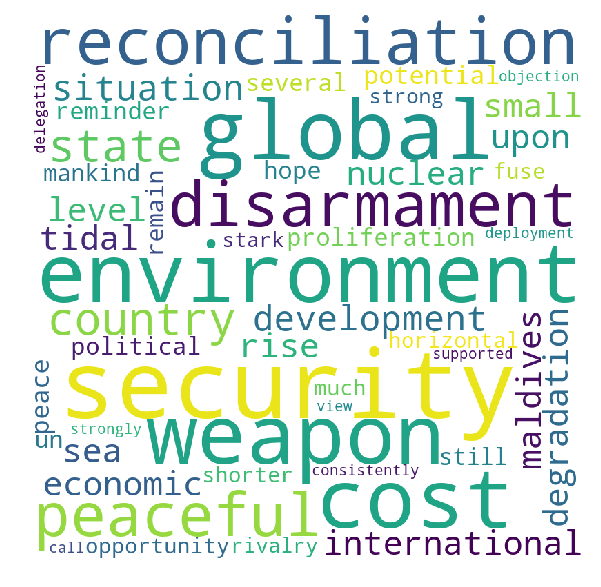

In [106]:
wordcloud3 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

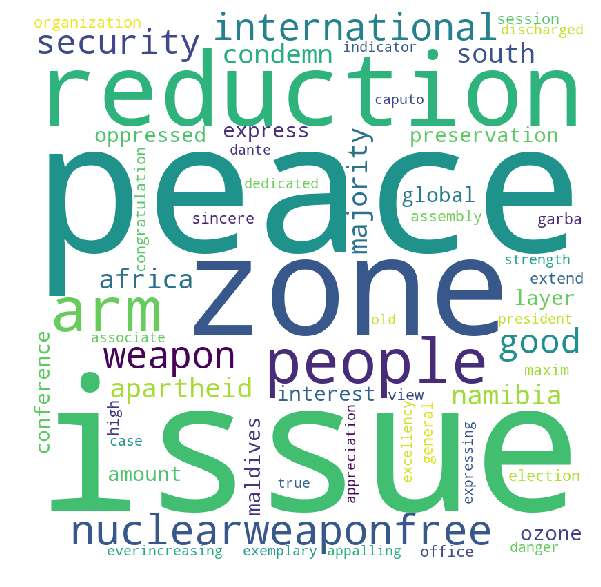

In [107]:
wordcloud4 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

``` Using LDA on Single Doc Now ```

In [108]:
from gensim import models
tfIdf = models.TfidfModel(doc_term_matrix)

In [109]:
corpusTfIdf = tfIdf[doc_term_matrix]

In [110]:
Lda = gensim.models.ldamodel.LdaModel
ldaBow = Lda(doc_term_matrix,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [111]:
ldaBow.print_topics(-1)

[(0,
  '0.046*"zone" + 0.035*"reduction" + 0.035*"peace" + 0.023*"arm" + 0.023*"nuclearweaponfree" + 0.023*"security" + 0.012*"always" + 0.012*"historic" + 0.012*"community" + 0.012*"chemical"'),
 (1,
  '0.001*"due" + 0.001*"cyprus" + 0.001*"intercommunal" + 0.001*"highlevel" + 0.001*"equality" + 0.001*"prolonged" + 0.001*"dialogue" + 0.001*"basis" + 0.001*"commend" + 0.001*"searching"'),
 (2,
  '0.001*"conflict" + 0.001*"party" + 0.001*"ceasefire" + 0.001*"pleased" + 0.001*"applaud" + 0.001*"firm" + 0.001*"iran" + 0.001*"united" + 0.001*"pessimistic" + 0.001*"created"'),
 (3,
  '0.001*"due" + 0.001*"cyprus" + 0.001*"intercommunal" + 0.001*"highlevel" + 0.001*"equality" + 0.001*"prolonged" + 0.001*"dialogue" + 0.001*"basis" + 0.001*"commend" + 0.001*"searching"'),
 (4,
  '0.001*"economic" + 0.001*"certain" + 0.001*"disproportionate" + 0.001*"one" + 0.001*"spell" + 0.001*"benefit" + 0.001*"country" + 0.001*"cooperation" + 0.001*"technology" + 0.001*"seven"'),
 (5,
  '0.001*"due" + 0.001

In [112]:
ldaTfIdf = Lda(corpusTfIdf,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [113]:
ldaTfIdf.print_topics(-1)

[(0,
  '0.001*"due" + 0.001*"cyprus" + 0.001*"intercommunal" + 0.001*"highlevel" + 0.001*"equality" + 0.001*"prolonged" + 0.001*"dialogue" + 0.001*"basis" + 0.001*"commend" + 0.001*"searching"'),
 (1,
  '0.001*"due" + 0.001*"cyprus" + 0.001*"intercommunal" + 0.001*"highlevel" + 0.001*"equality" + 0.001*"prolonged" + 0.001*"dialogue" + 0.001*"basis" + 0.001*"commend" + 0.001*"searching"'),
 (2,
  '0.012*"growth" + 0.012*"technology" + 0.012*"country" + 0.011*"economic" + 0.008*"continue" + 0.008*"longest" + 0.008*"profile" + 0.008*"disproportionate" + 0.008*"real" + 0.008*"price"'),
 (3,
  '0.001*"due" + 0.001*"cyprus" + 0.001*"intercommunal" + 0.001*"highlevel" + 0.001*"equality" + 0.001*"prolonged" + 0.001*"dialogue" + 0.001*"basis" + 0.001*"commend" + 0.001*"searching"'),
 (4,
  '0.030*"solution" + 0.020*"withdraw" + 0.020*"troop" + 0.017*"concerned" + 0.017*"lasting" + 0.017*"upon" + 0.017*"positive" + 0.014*"call" + 0.014*"problem" + 0.014*"party"'),
 (5,
  '0.001*"due" + 0.001*"cy

In [114]:
conceptMapBow = dict()
conceptWeightsBow = dict()
for tup in ldaBow.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapBow[tup[0]] = l1
    conceptWeightsBow[tup[0]] = l2

In [115]:
conceptMapTfIdf = dict()
conceptWeightsTfIdf = dict()
for tup in ldaTfIdf.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapTfIdf[tup[0]] = l1
    conceptWeightsTfIdf[tup[0]] = l2

### Performing Clustering on TF-IDF + LDA 

In [116]:
trainingClusteringTfIdf = conceptWeightsTfIdf.values()
trainingClusteringTfIdf = list(trainingClusteringTfIdf)

In [117]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

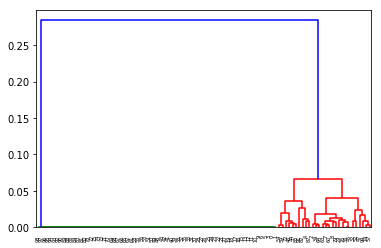

In [118]:
dendrogram = sch.dendrogram(sch.linkage(trainingClusteringTfIdf,method='ward'))

In [131]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [132]:
clustersTfIdf = hc.fit_predict(trainingClusteringTfIdf)

In [133]:
cluster1TfIdf = []
cluster2TfIdf = []
cluster3TfIdf = []
cluster4TfIdf = []
for i in range(len(trainingClusteringTfIdf)):
    if clustersTfIdf[i] == 0:
        cluster1TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 1:
        cluster2TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 2:
        cluster3TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 3:
        cluster4TfIdf.append(trainingClusteringTfIdf[i])

In [134]:
print("Length of Cluster 1:",len(cluster1TfIdf))
print("Length of Cluster 2:",len(cluster2TfIdf))
print("Length of Cluster 3:",len(cluster3TfIdf))
print("Length of Cluster 4:",len(cluster4TfIdf))

Length of Cluster 1: 10
Length of Cluster 2: 12
Length of Cluster 3: 6
Length of Cluster 4: 72


In [135]:
conceptWeightListTfIdf = list(conceptWeightsTfIdf.values())
conceptWordsListTfIdf = list(conceptMapTfIdf.values())

In [136]:
cluster1WordsTfIdf = []
cluster2WordsTfIdf = []
cluster3WordsTfIdf = []
cluster4WordsTfIdf = []
for vec in cluster1TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster1WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster2TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster2WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster3TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster3WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster4TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster4WordsTfIdf.append(conceptWordsListTfIdf[ind])

In [137]:
# Only for WordCloud. Total Show-off!
cluster1SentsTfIdf = [' '.join(ele) for ele in cluster1WordsTfIdf]
cluster2SentsTfIdf = [' '.join(ele) for ele in cluster2WordsTfIdf]
cluster3SentsTfIdf = [' '.join(ele) for ele in cluster3WordsTfIdf]
cluster4SentsTfIdf = [' '.join(ele) for ele in cluster4WordsTfIdf]

In [138]:
cluster1SentsTfIdf = ' '.join(cluster1SentsTfIdf)
cluster2SentsTfIdf = ' '.join(cluster2SentsTfIdf)
cluster3SentsTfIdf = ' '.join(cluster3SentsTfIdf)
cluster4SentsTfIdf = ' '.join(cluster4SentsTfIdf)

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

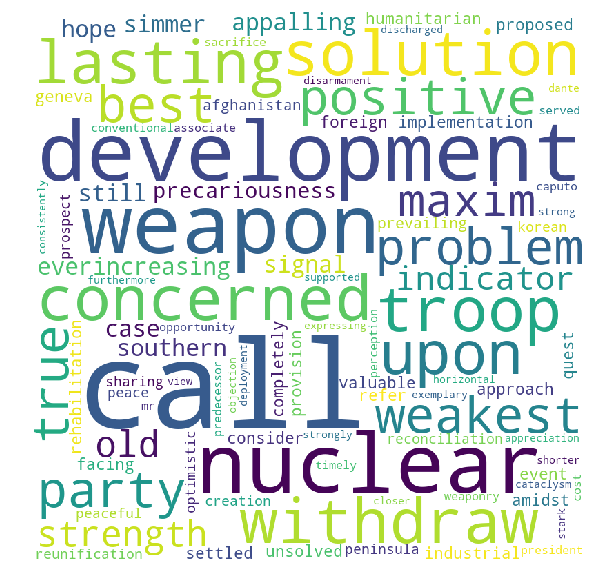

In [140]:
# WordCloud for Cluster 1
wordcloud1TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

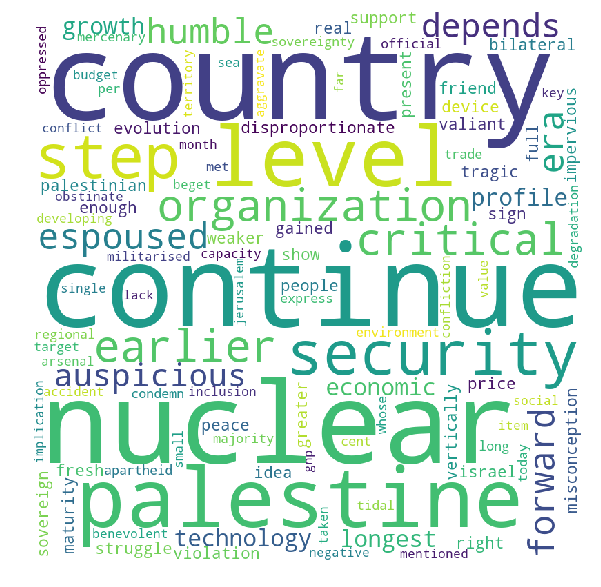

In [141]:
wordcloud2TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

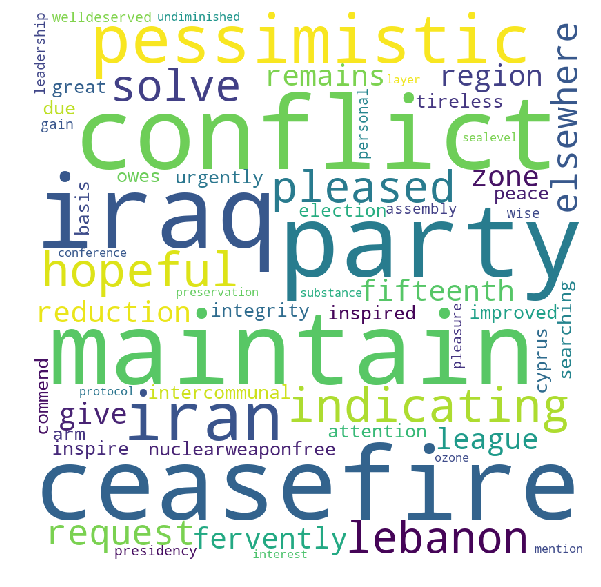

In [142]:
wordcloud3TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

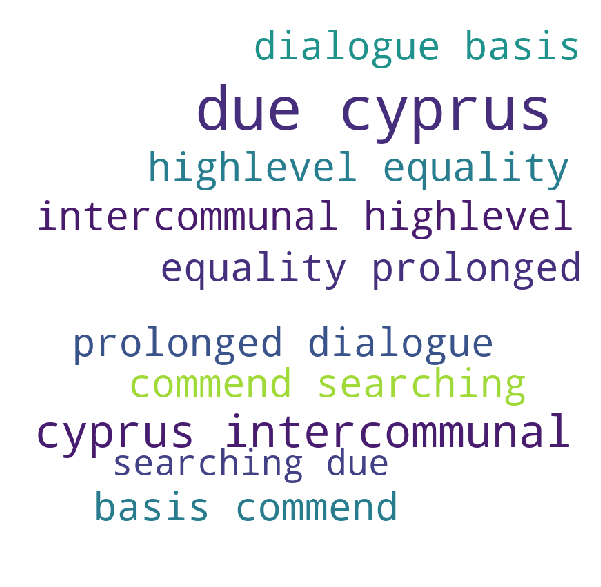

In [143]:
wordcloud4TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Performing Clustering on Bag of Words + LDA

In [152]:
trainingClustering = conceptWeightsBow.values()
trainingClustering = list(trainingClustering)

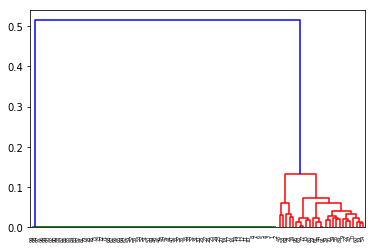

In [153]:
dendrogram = sch.dendrogram(sch.linkage(trainingClustering,method='ward'))

In [154]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [155]:
clustersBow = hc.fit_predict(trainingClustering)

In [156]:
cluster1Bow = []
cluster2Bow = []
cluster3Bow = []
cluster4Bow = []
for i in range(len(trainingClustering)):
    if clustersBow[i] == 0:
        cluster1Bow.append(trainingClustering[i])
    elif clustersBow[i] == 1:
        cluster2Bow.append(trainingClustering[i])
    elif clustersBow[i] == 2:
        cluster3Bow.append(trainingClustering[i])
    elif clustersBow[i] == 3:
        cluster4Bow.append(trainingClustering[i])

In [157]:
print("Length of Cluster 1:",len(cluster1Bow))
print("Length of Cluster 2:",len(cluster2Bow))
print("Length of Cluster 3:",len(cluster3Bow))
print("Length of Cluster 4:",len(cluster4Bow))

Length of Cluster 1: 5
Length of Cluster 2: 5
Length of Cluster 3: 16
Length of Cluster 4: 74


In [158]:
conceptWeightListBow = list(conceptWeightsBow.values())
conceptWordsListBow = list(conceptMapBow.values())

In [160]:
cluster1WordsBow = []
cluster2WordsBow = []
cluster3WordsBow = []
cluster4WordsBow = []
for vec in cluster1Bow:
    ind = conceptWeightListBow.index(vec)
    cluster1WordsBow.append(conceptWordsListBow[ind])
for vec in cluster2Bow:
    ind = conceptWeightListBow.index(vec)
    cluster2WordsBow.append(conceptWordsListBow[ind])
for vec in cluster3Bow:
    ind = conceptWeightListBow.index(vec)
    cluster3WordsBow.append(conceptWordsListBow[ind])
for vec in cluster4Bow:
    ind = conceptWeightListBow.index(vec)
    cluster4WordsBow.append(conceptWordsListBow[ind])

In [161]:
# Only for WordCloud. Total Show-off!
cluster1SentsBow = [' '.join(ele) for ele in cluster1WordsBow]
cluster2SentsBow = [' '.join(ele) for ele in cluster2WordsBow]
cluster3SentsBow = [' '.join(ele) for ele in cluster3WordsBow]
cluster4SentsBow = [' '.join(ele) for ele in cluster4WordsBow]

In [162]:
cluster1SentsBow = ' '.join(cluster1SentsBow)
cluster2SentsBow = ' '.join(cluster2SentsBow)
cluster3SentsBow = ' '.join(cluster3SentsBow)
cluster4SentsBow = ' '.join(cluster4SentsBow)

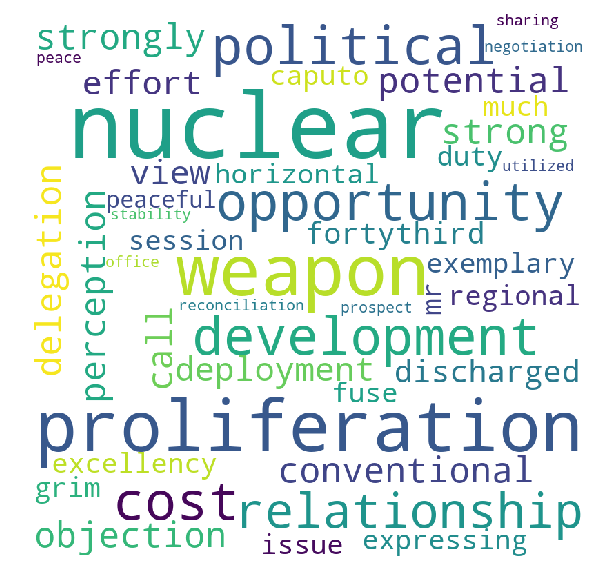

In [163]:
# WordCloud for Cluster 1
wordcloud1Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

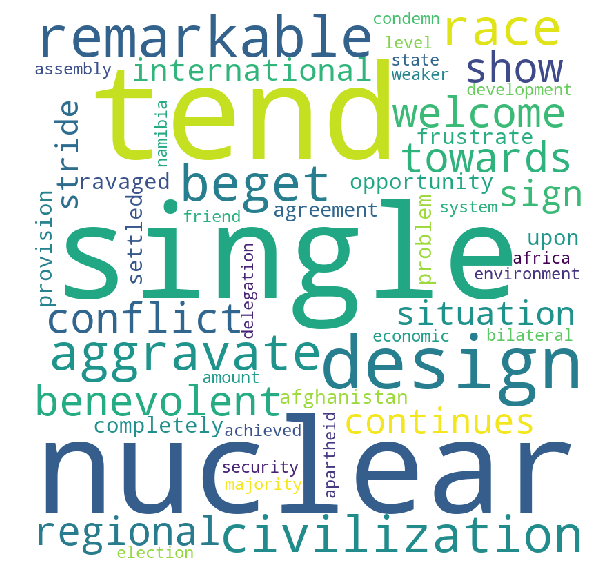

In [164]:
wordcloud2Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

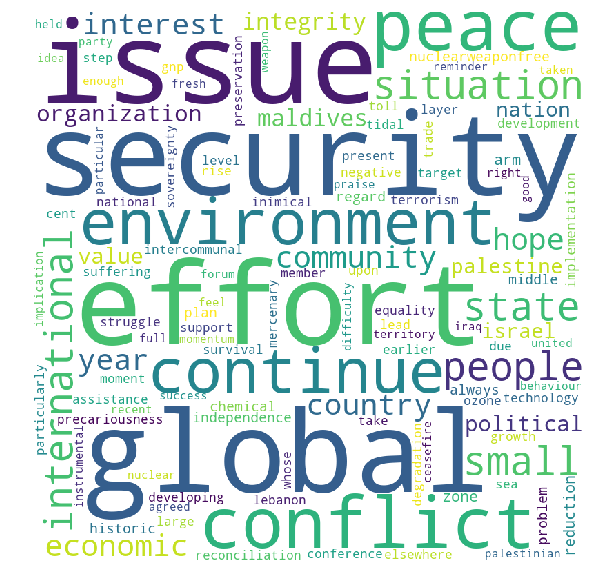

In [165]:
wordcloud3Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

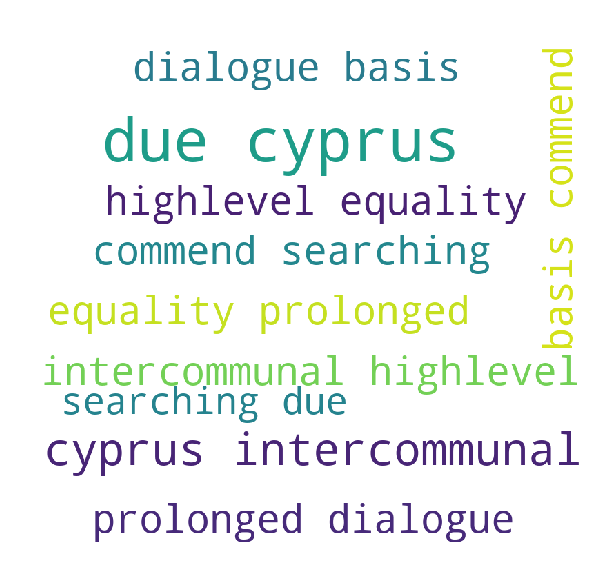

In [166]:
wordcloud4Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 